DATA EXPLORATION

In [1]:
import pandas as pd

df = pd.read_csv(r"Laptop_Price.csv")

df.head()


,Manufacturer,IntelCore(i-),IntelCoreGen,processing speed(GHz),Ram(gb),HDD(gb),SSD(gb),Graphics(gb),ScreenSize(inch),Price
0,Dell,3,7,2.29,4,1000,0,0,15.6,39057
1,Dell,3,7,2.30,4,1000,0,0,15.6,45141
2,HP,3,7,2.30,8,256,256,0,14.0,35999
3,ASUS,3,7,2.30,4,1000,0,0,14.0,39990
4,HP,3,7,2.40,4,1000,0,0,15.6,36263


In [2]:
df.columns

Index(['Manufacturer', 'IntelCore(i-)', 'IntelCoreGen',
       'processing speed(GHz)', 'Ram(gb)', 'HDD(gb)', 'SSD(gb)',
       'Graphics(gb)', 'ScreenSize(inch)', 'Price'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Manufacturer           99 non-null     object 
 1   IntelCore(i-)          99 non-null     int64  
 2   IntelCoreGen           99 non-null     int64  
 3   processing speed(GHz)  99 non-null     float64
 4   Ram(gb)                99 non-null     int64  
 5   HDD(gb)                99 non-null     int64  
 6   SSD(gb)                99 non-null     int64  
 7   Graphics(gb)           99 non-null     int64  
 8   ScreenSize(inch)       99 non-null     float64
 9   Price                  99 non-null     int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 7.9+ KB


In [4]:
df.isnull().sum()

Manufacturer             0
IntelCore(i-)            0
IntelCoreGen             0
processing speed(GHz)    0
Ram(gb)                  0
HDD(gb)                  0
SSD(gb)                  0
Graphics(gb)             0
ScreenSize(inch)         0
Price                    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Manufacturer           99 non-null     object 
 1   IntelCore(i-)          99 non-null     int64  
 2   IntelCoreGen           99 non-null     int64  
 3   processing speed(GHz)  99 non-null     float64
 4   Ram(gb)                99 non-null     int64  
 5   HDD(gb)                99 non-null     int64  
 6   SSD(gb)                99 non-null     int64  
 7   Graphics(gb)           99 non-null     int64  
 8   ScreenSize(inch)       99 non-null     float64
 9   Price                  99 non-null     int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 7.9+ KB


DATA PREPROCESSING

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Manufacturer'] = label_encoder.fit_transform(df['Manufacturer'])

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['Manufacturer', 'IntelCore(i-)', 'IntelCoreGen',
       'processing speed(GHz)', 'Ram(gb)', 'HDD(gb)', 'SSD(gb)',
       'Graphics(gb)', 'ScreenSize(inch)']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [8]:
df = df.drop(['IntelCore(i-)','IntelCoreGen','processing speed(GHz)','HDD(gb)','ScreenSize(inch)'], axis=1)
df

,Manufacturer,Ram(gb),SSD(gb),Graphics(gb),Price
0,1,4,0,0,39057
1,1,4,0,0,45141
2,2,8,256,0,35999
3,0,4,0,0,39990
4,2,4,0,0,36263
...,...,...,...,...,...
94,1,16,0,2,78999
95,0,8,2048,4,189990
96,2,4,1024,4,99999
97,1,8,2048,4,219990


DATA VISUALIZATION

C:\Users\Sinan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


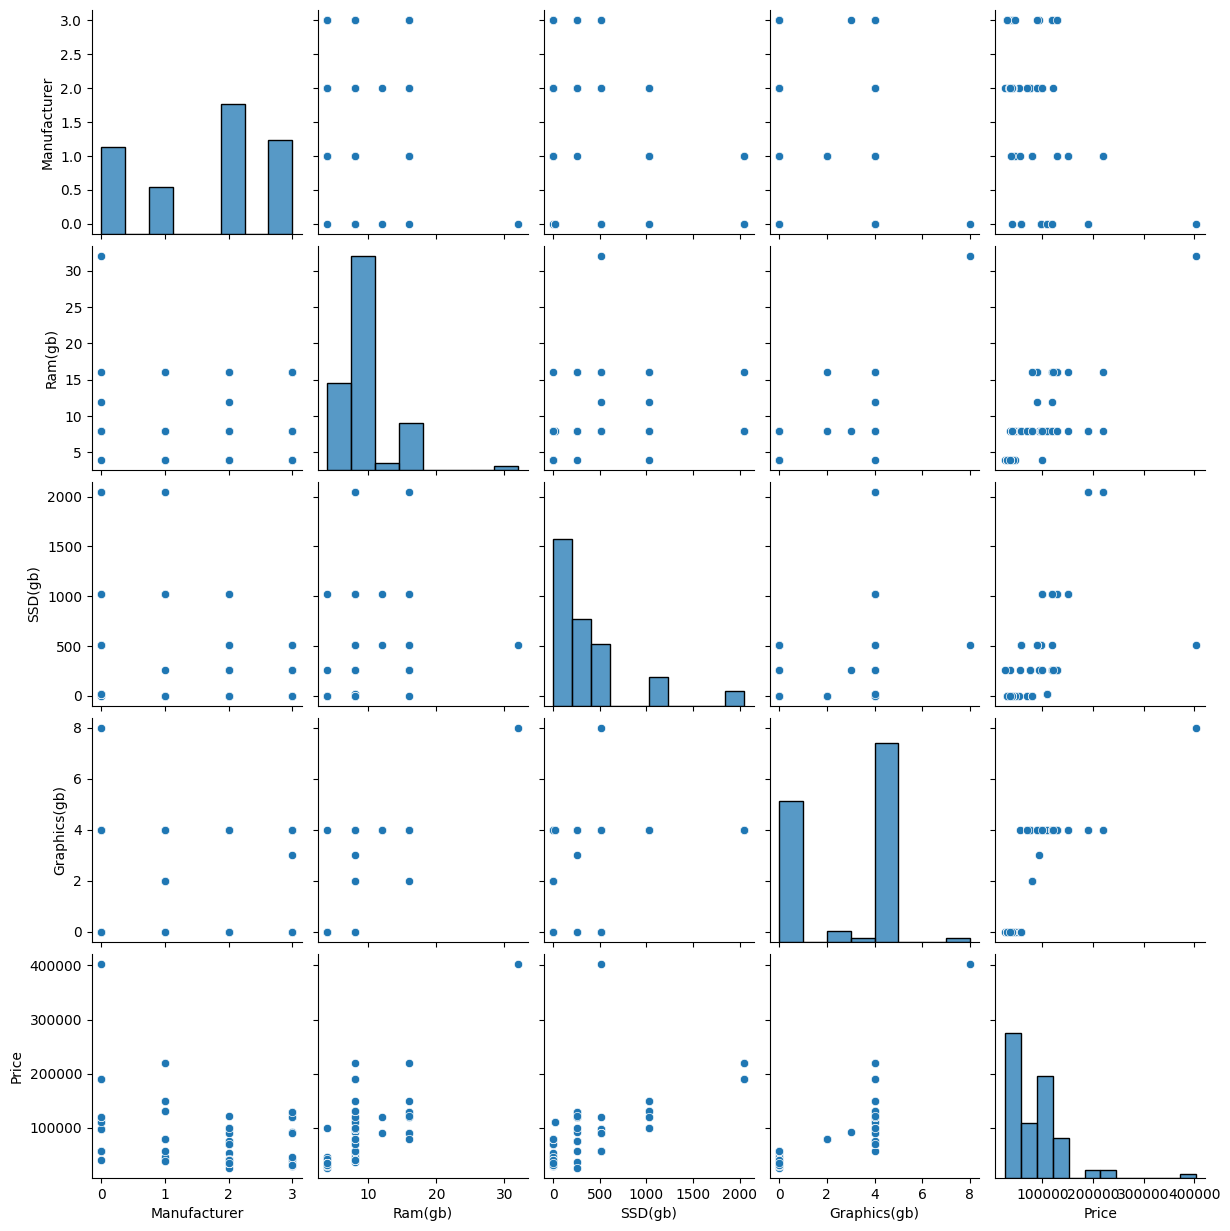

In [9]:
import seaborn as sb
sb.pairplot(df)

<Axes: >

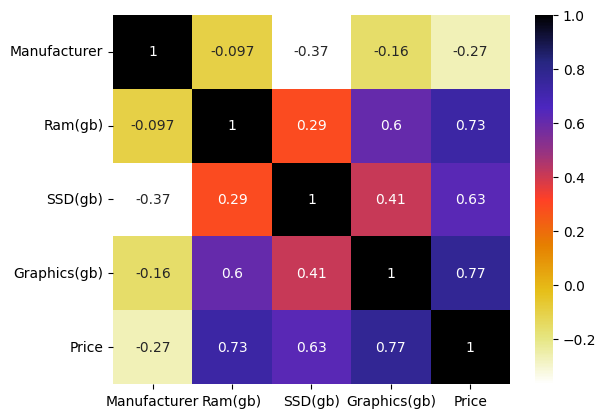

In [10]:
import matplotlib.pyplot as plt
corr = df.corr(method='pearson')
sb.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)

DATA SPLITTING

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

CHOOSING & TRAINING MODEL

In [12]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(random_state = 0)
model_RF.fit(X, y)

y_pred = model_RF.predict(X_test)

In [13]:
from sklearn.metrics import r2_score

print(f"R2_Score:{r2_score(y_test, y_pred)*100}")

R2_Score:99.09081249632644


We have got a accuracy of 99.0908%

In [14]:
y_pred = model_RF.predict(X_test)
print("Predicted Values:")
print(y_pred[:10])

Predicted Values:
[ 92990 189990  35999  97990  97990 129999  56990  35634  74931  78999]
